In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [5]:
image_size =128
batch_size = 32
num_classes=4

In [6]:
dataset_test=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset of project/Combined Dataset/test",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size,
    color_mode="grayscale"
)

dataset_train=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset of project/Combined Dataset/train",
    shuffle=True,
    image_size=(image_size,image_size),
    batch_size=batch_size,
    color_mode="grayscale"
)

Found 1279 files belonging to 4 classes.
Found 10330 files belonging to 4 classes.


In [7]:
class_names_test=dataset_test.class_names
class_names_train=dataset_train.class_names
print("test columns is "+str(class_names_test))
print("train columns is "+str(class_names_train))

test columns is ['Mild Impairment', 'Moderate Impairment', 'No Impairment', 'Very Mild Impairment']
train columns is ['Mild Impairment', 'Moderate Impairment', 'No Impairment', 'Very Mild Impairment']


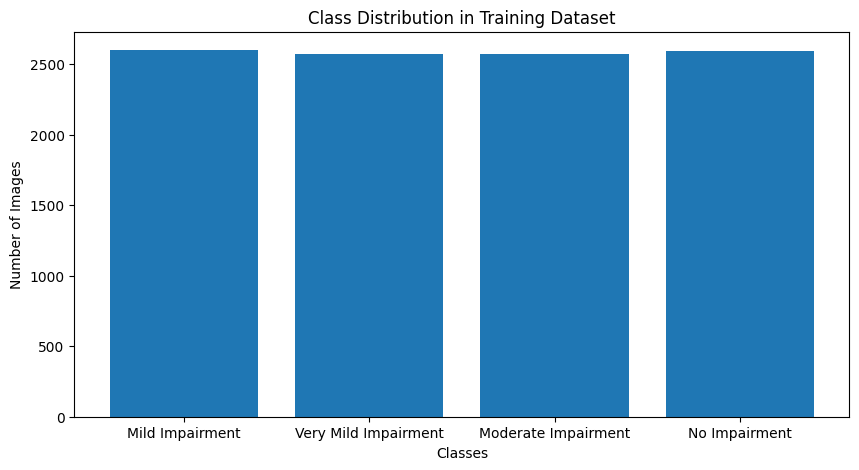

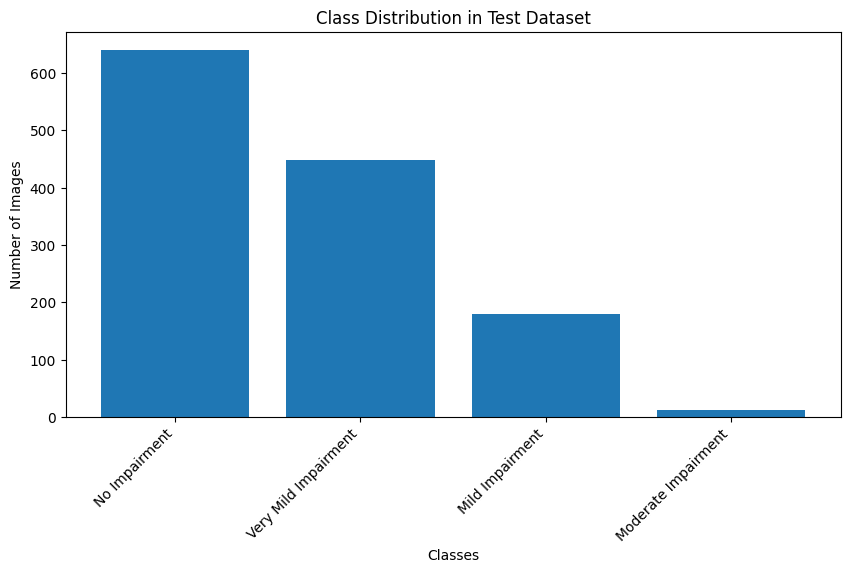

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

class_counts_train = {}
for images, labels in dataset_train:
    for label in labels.numpy():
        class_counts_train[label] = class_counts_train.get(label, 0) + 1

class_names_train_indices = list(class_counts_train.keys())
counts_train = list(class_counts_train.values())

# Use class_names_train to get string labels
class_names_train_str = [class_names_train[i] for i in class_names_train_indices]

plt.figure(figsize=(10, 5))
plt.bar(class_names_train_str, counts_train)
plt.title('Class Distribution in Training Dataset')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
#Use code with caution
#For the test dataset:
class_counts_test = {}
for images, labels in dataset_test:
    for label in labels.numpy():
        class_counts_test[label] = class_counts_test.get(label, 0) + 1

class_names_test_indices = list(class_counts_test.keys())
counts_test = list(class_counts_test.values())

# Use class_names_test to get string labels
class_names_test_str = [class_names_test[i] for i in class_names_test_indices]

plt.figure(figsize=(10, 5))
plt.bar(class_names_test_str, counts_test)
plt.title('Class Distribution in Test Dataset')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.show()

In [8]:
train_size=int(0.8*dataset_train.cardinality().numpy())
val_size=int(0.2*dataset_train.cardinality().numpy())

dataset_train_full=dataset_train.shuffle(buffer_size=1000)
dataset_train=dataset_train_full.take(train_size)
dataset_val=dataset_train_full.skip(train_size)

In [9]:
print("Train size:", dataset_train.cardinality().numpy())
print("Validation size:", dataset_val.cardinality().numpy())

Train size: 258
Validation size: 65


In [10]:
normalization_layer = layers.Rescaling(1.0 / 255)
dataset_train = dataset_train.map(lambda x, y: (normalization_layer(x), y))
dataset_val = dataset_val.map(lambda x, y: (normalization_layer(x), y))
dataset_test = dataset_test.map(lambda x, y: (normalization_layer(x), y))

In [11]:
AUTOTUNE = tf.data.AUTOTUNE
dataset_train = dataset_train.prefetch(buffer_size=AUTOTUNE)
dataset_val = dataset_val.prefetch(buffer_size=AUTOTUNE)
dataset_test = dataset_test.prefetch(buffer_size=AUTOTUNE)

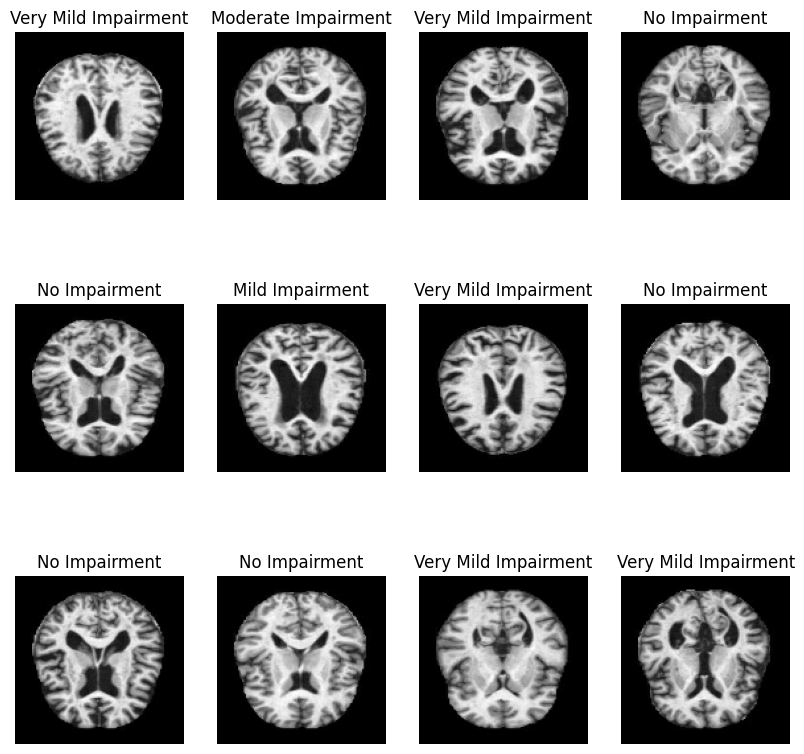

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset_test.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)

        # Convert grayscale image from (128,128,1) to (128,128)
        image = image_batch[i].numpy().squeeze()

        # Use cmap='gray' to ensure correct grayscale rendering
        plt.imshow(image, cmap="gray")
        plt.title(class_names_test[label_batch[i].numpy()])
        plt.axis("off")
plt.show()

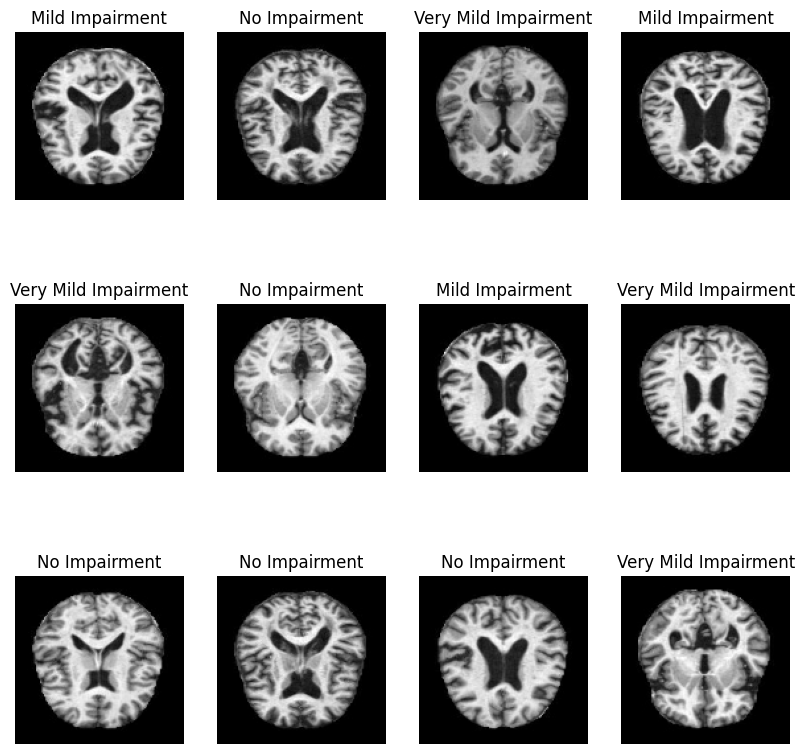

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset_test.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)

        # Convert grayscale image from (128,128,1) to (128,128)
        image = image_batch[i].numpy().squeeze()

        # Use cmap='gray' to ensure correct grayscale rendering
        plt.imshow(image, cmap="gray")
        plt.title(class_names_train[label_batch[i].numpy()])
        plt.axis("off")
plt.show()

In [12]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size, image_size, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Assuming categorical classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 830,724 (3.17 MB)

 Trainable params: 830,724 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history=model.fit(
    dataset_train,
    validation_data=dataset_val,
    epochs=50
)

Epoch 1/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1717s 1s/step - accuracy: 0.3554 - loss: 1.2803 - val_accuracy: 0.7130 - val_loss: 0.6178
Epoch 2/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 388s 1s/step - accuracy: 0.7020 - loss: 0.6634 - val_accuracy: 0.8091 - val_loss: 0.4406
Epoch 3/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 413s 1s/step - accuracy: 0.7732 - loss: 0.5007 - val_accuracy: 0.8452 - val_loss: 0.3525
Epoch 4/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 347s 1s/step - accuracy: 0.8287 - loss: 0.3923 - val_accuracy: 0.8894 - val_loss: 0.2514
Epoch 5/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 417s 1s/step - accuracy: 0.8660 - loss: 0.3077 - val_accuracy: 0.9190 - val_loss: 0.1940
Epoch 6/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - accuracy: 0.8936 - loss: 0.2468 - val_accuracy: 0.9394 - val_loss: 0.1626
Epoch 7/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 413s 1s/step - accuracy: 0.9129 - loss: 0.2094 - val_accuracy: 0.9505 - val_loss: 0.1187
Epoch 8/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.9268 - loss: 0.1757 - val_acc

In [16]:
stest_loss, test_acc = model.evaluate(dataset_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")

40/40 ━━━━━━━━━━━━━━━━━━━━ 255s 6s/step - accuracy: 0.9577 - loss: 0.1691
Test accuracy: 96.40%


In [17]:
model.save('/content/drive/MyDrive/AI/model.keras') # Changed the extension to '.keras'